## **Support Vector Regression**

- Load and Explor the DataSet

In [1]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [2]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [7]:
df.isnull().sum()

,0
Years of Experience,0
Salary,0


In [8]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


# Feature Scaling(Very Important for SVR)

In [24]:
from sklearn.preprocessing import StandardScaler

X=df[["Years of Experience"]].values
y=df[["Salary"]].values

sc_X=StandardScaler()
sc_y=StandardScaler()

X_scaled=sc_X.fit_transform(X)
y_scaled=sc_y.fit_transform(y)



- Flatten y for SVR

In [10]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

In [13]:
y_scaled=y_scaled.ravel()


In [14]:
y_scaled

array([-0.47983873, -0.95348286,  0.65690718, ..., -1.14294051,
        0.46744953, -1.52185581])

- Train SVR Model(RBF Kernel)

In [16]:
from sklearn.svm import SVR

svr=SVR(kernel="rbf",C=100,epsilon=0.1)
svr.fit(X_scaled,y_scaled)

SVR(C=100)

- Predictions and Inverse Scaling

In [17]:
y_pred_scaled=svr.predict(X_scaled)
y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

In [18]:
y_pred_scaled

array([-0.44592988, -0.95928686,  1.16101663, ..., -0.71943669,
        1.02434885, -1.33765207])

In [20]:
y_pred

array([[ 91789.78489284],
       [ 64693.65154467],
       [176608.02755474],
       ...,
       [ 77353.48189214],
       [169394.39541345],
       [ 44722.68696322]])

# Visualization :Actual vs Predicted

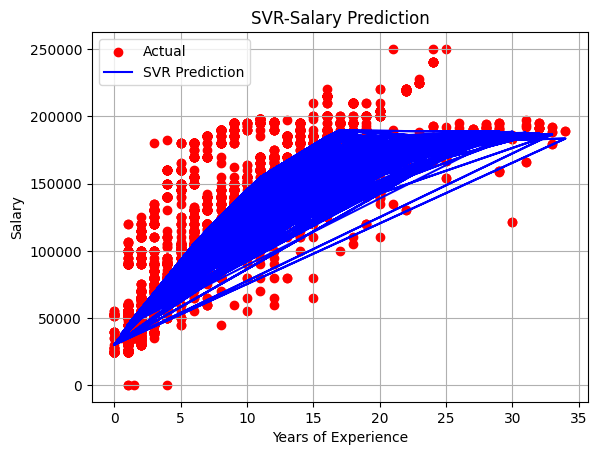

In [22]:
import matplotlib.pyplot as plt

plt.scatter(X,y,color="red",label='Actual')
plt.plot(X,y_pred,color="blue",label='SVR Prediction')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("SVR-Salary Prediction")
plt.grid(True)
plt.legend()
plt.show()

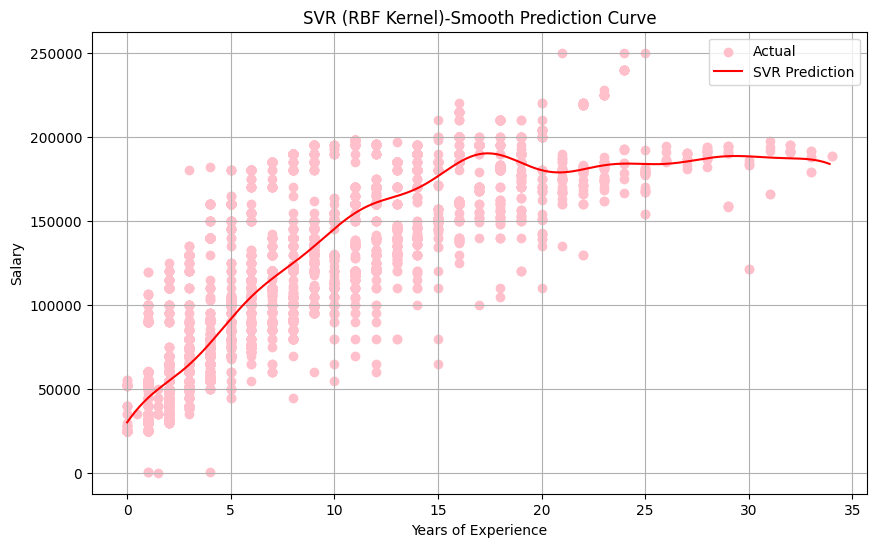

In [32]:
import numpy as np
import matplotlib.pyplot as plt

#Create a fine grid between min and max Years Experience
X_grid=np.arange(min(X.ravel()),max(X.ravel()),0.1)
X_grid=X_grid.reshape(-1,1)

#Scale X_grid just like training data
X_grid_scaled=sc_X.transform(X_grid)

#Predict on the grid and inverse transform the result
y_grid_scaled=svr.predict(X_grid_scaled)
y_grid=sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

#Plot
plt.figure(figsize=(10,6))
plt.scatter(X,y,color="pink",label='Actual')
plt.plot(X_grid,y_grid,color="red",label='SVR Prediction')
plt.title("SVR (RBF Kernel)-Smooth Prediction Curve")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.show()

- Evaluate Model Performance

In [33]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

mse=mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y,y_pred)

print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

MSE: 759013901.8514212
RMSE: 27550.20692937571
R2 Score: 0.7275580175081495


- Compare Kernels using code

Kernel:LINEAR|R2 Score:0.6326


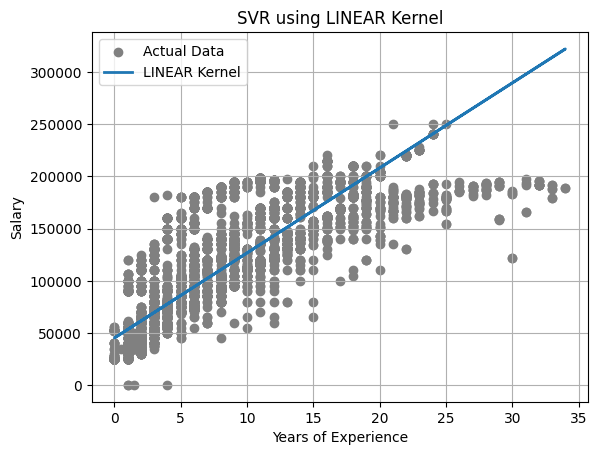

Kernel:POLY|R2 Score:0.0578


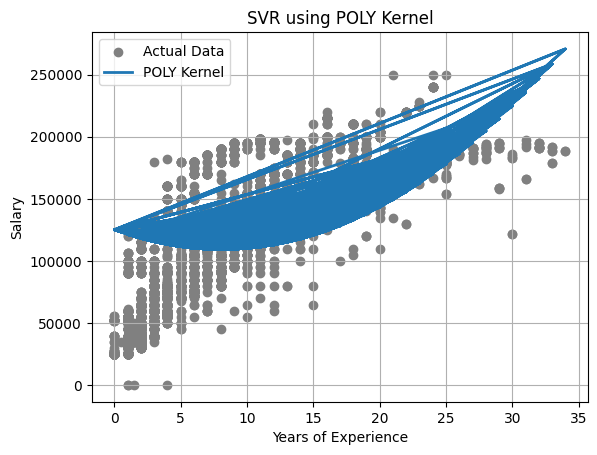

Kernel:RBF|R2 Score:0.7249


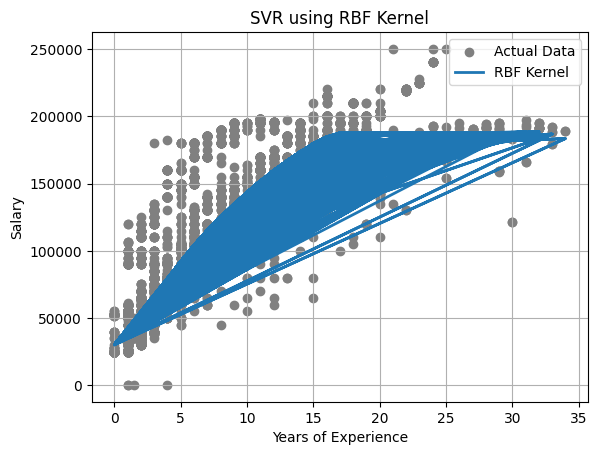

In [34]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 1.Load and scale data
X=df[['Years of Experience']].values
y=df[['Salary']].values

sc_X=StandardScaler()
sc_y=StandardScaler()

X_scaled=sc_X.fit_transform(X)
y_scaled=sc_y.fit_transform(y).ravel()

# 2.Define Kernels
kernels=['linear','poly','rbf']

# 3.Train and evaluate each kernel
for kernel in kernels:
   if kernel=='poly':
    model=SVR(kernel=kernel,degree=2)
   else:
    model=SVR(kernel=kernel)

   model.fit(X_scaled,y_scaled)

   #Predict for training data
   y_pred_scaled=model.predict(X_scaled)
   y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

   #Evaluation
   score=r2_score(y,y_pred)
   print(f"Kernel:{kernel.upper()}|R2 Score:{score:.4f}")

   # Plot
   plt.scatter(X,y,color='gray',label='Actual Data')
   plt.plot(X,y_pred,label=f'{kernel.upper()} Kernel',linewidth=2)
   plt.title(f'SVR using {kernel.upper()} Kernel')
   plt.xlabel('Years of Experience')
   plt.ylabel('Salary')
   plt.grid(True)
   plt.legend()
   plt.show()

- Try Different C and Epsilon Values

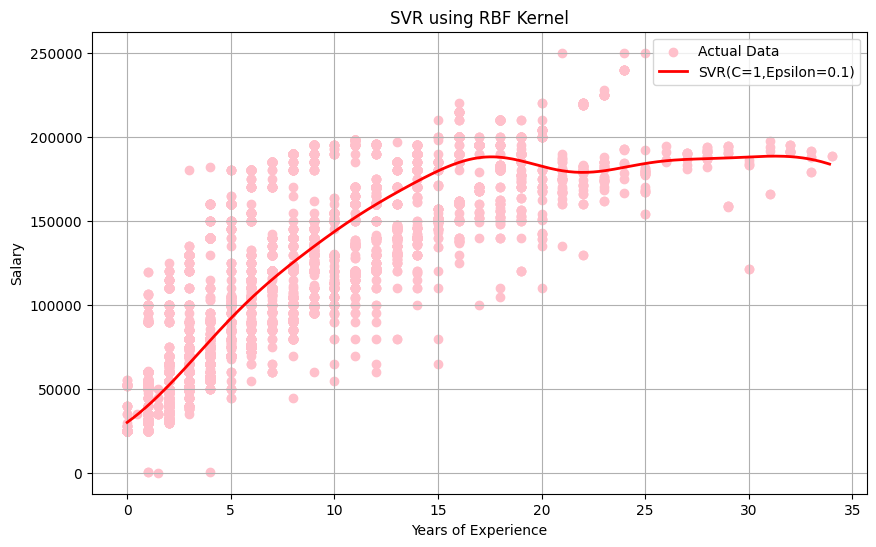

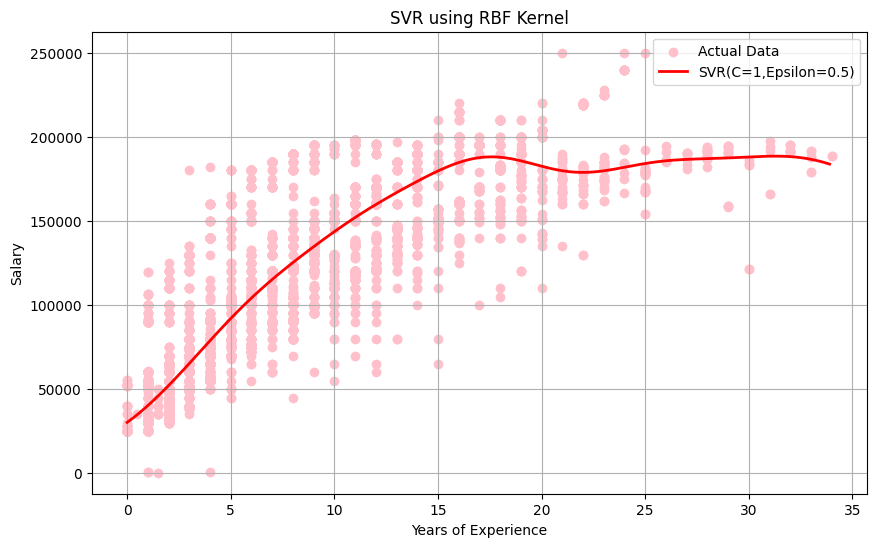

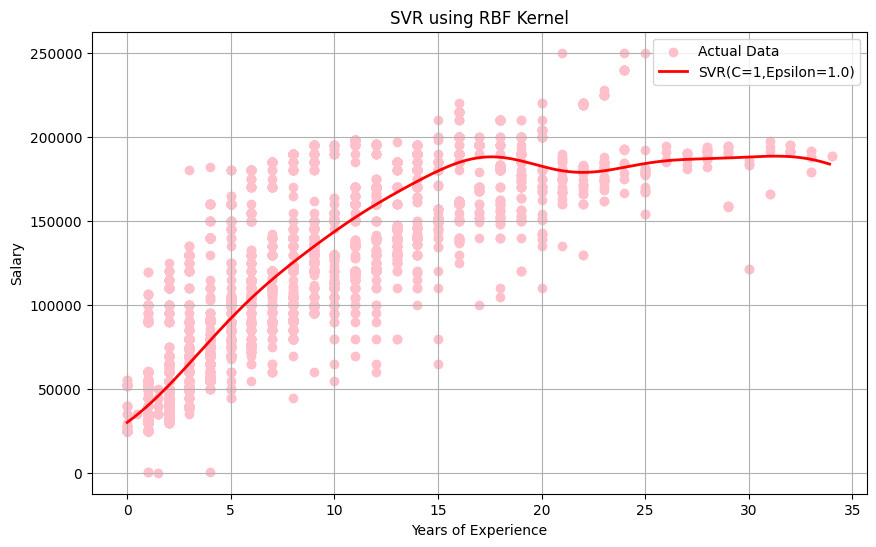

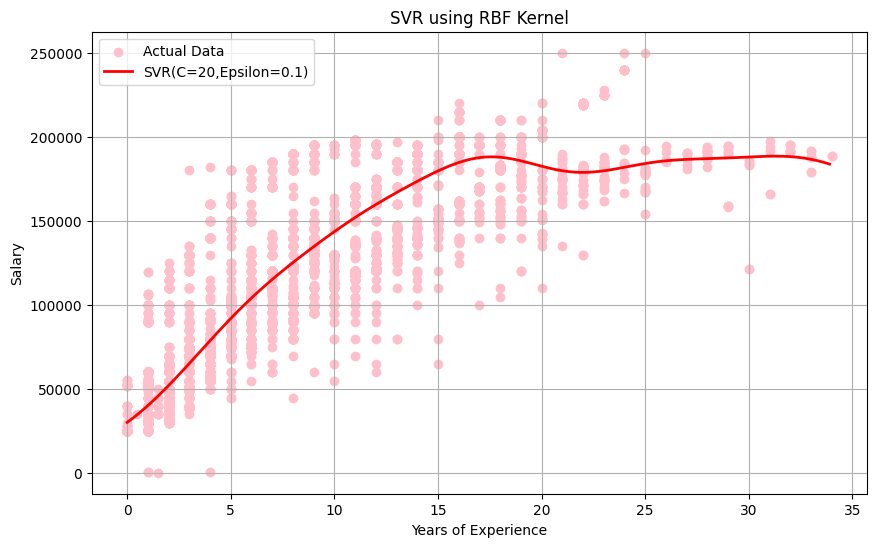

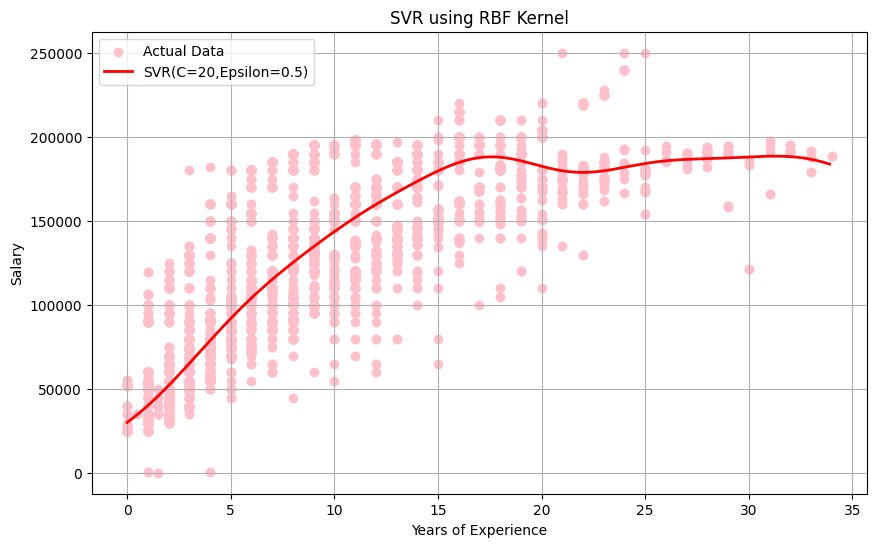

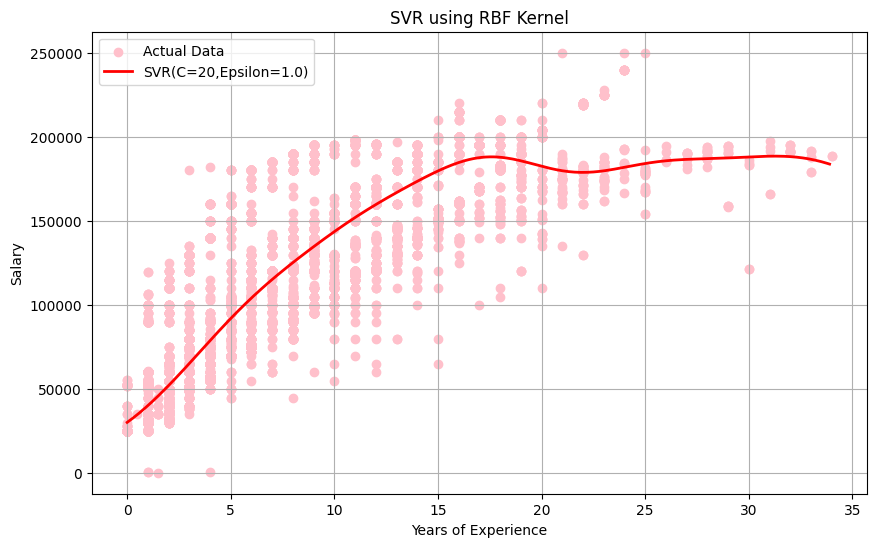

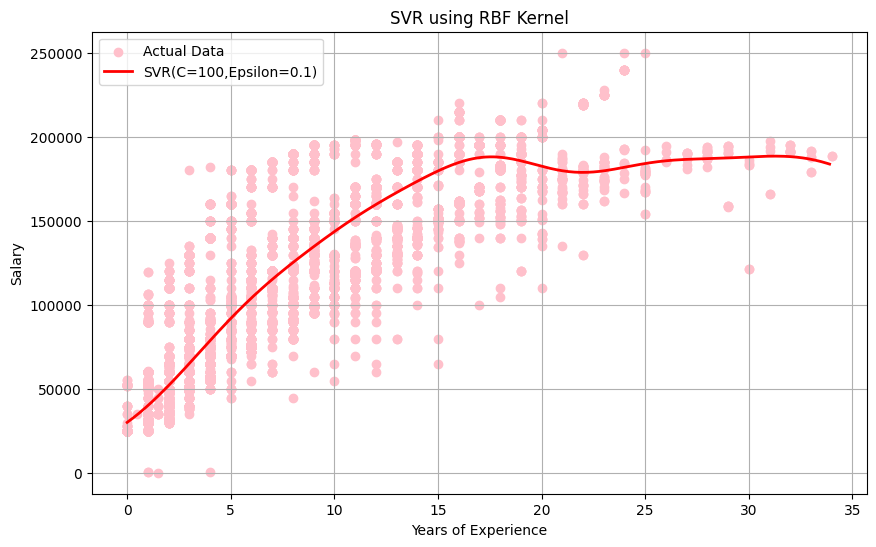

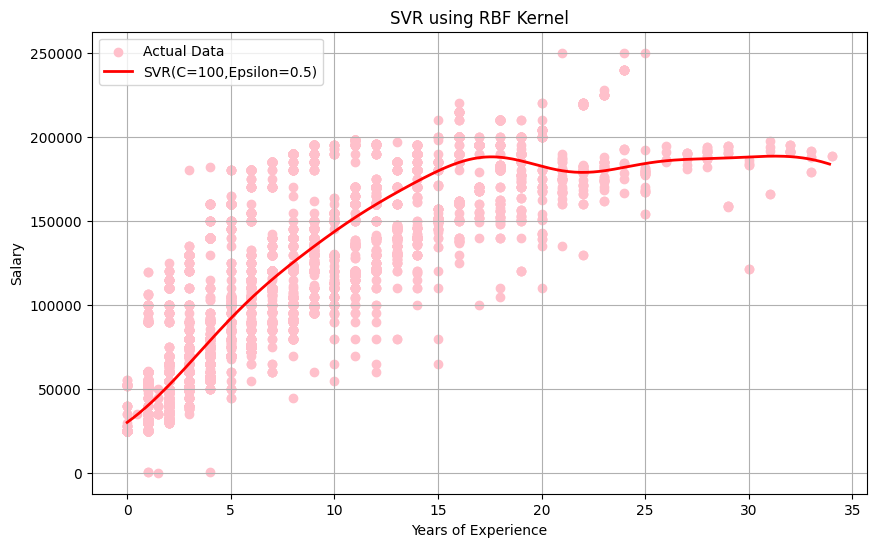

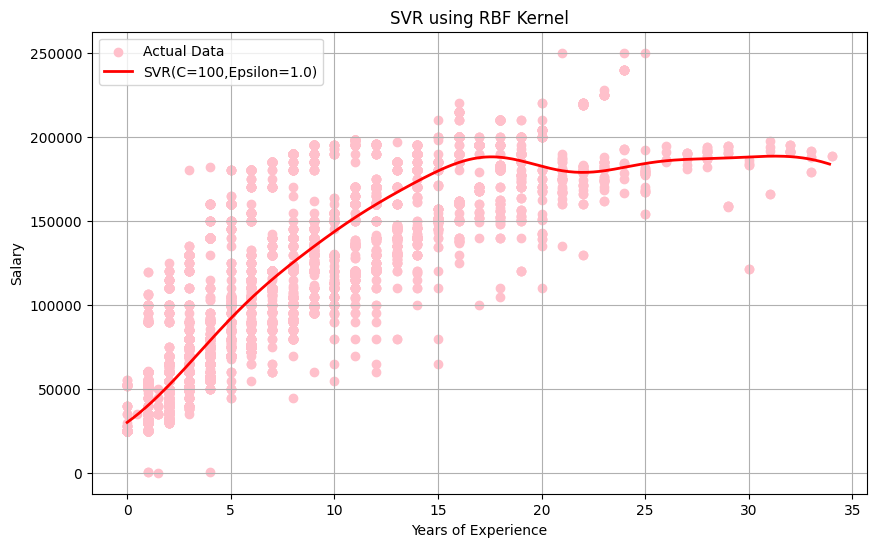

In [37]:
C_values=[1,20,100]
epsilon_values=[0.1,0.5,1.0]

X_grid=np.arange(min(X.ravel()),max(X.ravel()),0.1)
X_grid=X_grid.reshape(-1,1)

X_grid_scaled=sc_X.transform(X_grid)

for c in C_values:
    for eps in epsilon_values:
        svr=SVR(kernel='rbf',C=c,epsilon=eps)
        svr.fit(X_scaled,y_scaled)

        y_grid_scaled=model.predict(X_grid_scaled)
        y_grid=sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

        plt.figure(figsize=(10,6))
        plt.scatter(X,y,color='pink',label='Actual Data')
        plt.plot(X_grid,y_grid,color='red',label=f'SVR(C={c},Epsilon={eps})',linewidth=2)
        plt.title(f'SVR using RBF Kernel')
        plt.xlabel('Years of Experience')
        plt.ylabel('Salary')
        plt.grid(True)
        plt.legend()
        plt.show()
